<a href="https://colab.research.google.com/github/Topsan2002/Artificial-Intelligence/blob/main/CNN_Friut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


In [10]:
!kaggle datasets download -d moltean/fruits

 99% 1.28G/1.28G [00:16<00:00, 22.4MB/s]
100% 1.28G/1.28G [00:16<00:00, 81.5MB/s]


In [11]:
import zipfile
zip_ref = zipfile.ZipFile('fruits.zip', 'r')
zip_ref.extractall('/content/input')
zip_ref.close()

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')
# import cv2
import itertools

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,Dropout
from keras.models import Model, Sequential
# from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix,classification_report
import imageio
import matplotlib.image as img

import os
import pathlib

import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.applications import imagenet_utils

In [14]:
path = pathlib.Path("/content/input/fruits-360_dataset/fruits-360")


In [34]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_data=train_gen.flow_from_directory("/content/input/fruits-360_dataset/fruits-360/Training",target_size=(100,100),batch_size=32,class_mode='categorical',shuffle=True,subset='training')
test_data=train_gen.flow_from_directory("/content/input/fruits-360_dataset/fruits-360/Test",target_size=(100,100),batch_size=1,shuffle=False,subset='validation')

Found 54190 images belonging to 131 classes.
Found 4481 images belonging to 131 classes.


In [35]:
cnn=keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=32,kernel_size=3,
                            padding='valid',activation='relu',input_shape=(100,100,3)))
cnn.add(keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(40,activation='relu'))
cnn.add(keras.layers.Dropout(rate= 0.1, seed= 100))
cnn.add(keras.layers.Dense(units=131,activation='sigmoid'))

In [36]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 76832)             0         
                                                                 
 dense_8 (Dense)             (None, 40)                3073320   
                                                                 
 dropout_4 (Dropout)         (None, 40)                0         
                                                                 
 dense_9 (Dense)             (None, 131)               5371      
                                                      

In [38]:
cnn.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [40]:
cnn.fit(train_data,epochs=10,validation_data=test_data,shuffle=True)


Epoch 1/10
1694/1694 [==============================] - 63s 37ms/step - loss: 2.4177 - accuracy: 0.3683 - val_loss: 1.9418 - val_accuracy: 0.4651
Epoch 2/10
1694/1694 [==============================] - 63s 37ms/step - loss: 2.1933 - accuracy: 0.4482 - val_loss: 1.9405 - val_accuracy: 0.4515
Epoch 3/10
1694/1694 [==============================] - 67s 39ms/step - loss: 2.0716 - accuracy: 0.4986 - val_loss: 1.6806 - val_accuracy: 0.5825
Epoch 4/10
1694/1694 [==============================] - 63s 37ms/step - loss: 1.7749 - accuracy: 0.5925 - val_loss: 1.3097 - val_accuracy: 0.6664
Epoch 5/10
1694/1694 [==============================] - 65s 39ms/step - loss: 1.5752 - accuracy: 0.6497 - val_loss: 1.1567 - val_accuracy: 0.7503
Epoch 6/10
1694/1694 [==============================] - 62s 37ms/step - loss: 1.5009 - accuracy: 0.6707 - val_loss: 1.0821 - val_accuracy: 0.7561
Epoch 7/10
1694/1694 [==============================] - 55s 33ms/step - loss: 1.4515 - accuracy: 0.6899 - val_loss: 1.1888 -

In [41]:
def plot(c):
    plt.plot(c.history.history['accuracy'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_accuracy'],marker='*',color='green',markersize=10)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(c.history.history['loss'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_loss'],marker='*',color='green',markersize=10)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()

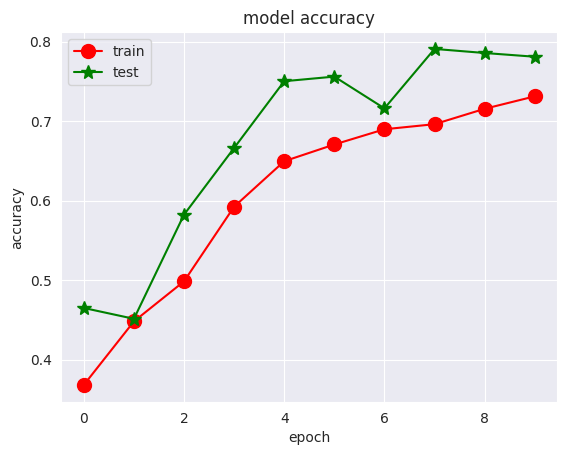

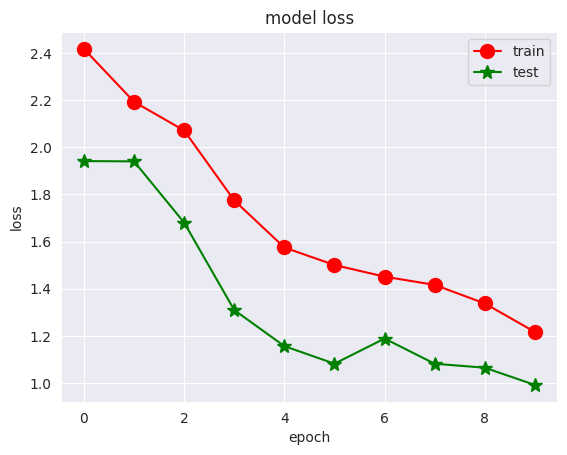

In [42]:
plot(cnn)

In [49]:
# test dataset pipeline
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/content/input/fruits-360_dataset/fruits-360/Test',
    seed=42,
    shuffle=True,
    image_size=(100,100),
    batch_size=32
)

Found 22688 files belonging to 131 classes.


In [51]:
ts_class_names = test_dataset.class_names
ts_class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

first image to predict
actual label: Pear Forelle
1/1 [==============================] - 0s 20ms/step
2
predicted label: Apple Golden 1


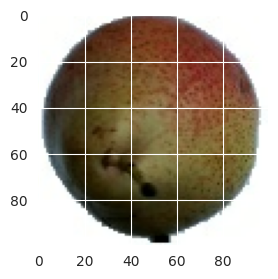

In [76]:
class_indices_array = np.array(list(train_data.class_indices.keys()))
plt.figure(figsize=(3, 3))
for images_batch, labels_batch in test_dataset.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",ts_class_names[first_label])

    batch_prediction = cnn.predict(images_batch)
    print(np.argmax(batch_prediction[0]))
    print("predicted label:",class_indices_array[np.argmax(batch_prediction[0])])

In [64]:
train_data.class_indices.keys()

a =   train_data.class_indices.keys()

class_indices_array = np.array(list(train_data.class_indices.keys()))

print(class_indices_array)

['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' 'Apple Golden 2'
 'Apple Golden 3' 'Apple Granny Smith' 'Apple Pink Lady' 'Apple Red 1'
 'Apple Red 2' 'Apple Red 3' 'Apple Red Delicious' 'Apple Red Yellow 1'
 'Apple Red Yellow 2' 'Apricot' 'Avocado' 'Avocado ripe' 'Banana'
 'Banana Lady Finger' 'Banana Red' 'Beetroot' 'Blueberry' 'Cactus fruit'
 'Cantaloupe 1' 'Cantaloupe 2' 'Carambula' 'Cauliflower' 'Cherry 1'
 'Cherry 2' 'Cherry Rainier' 'Cherry Wax Black' 'Cherry Wax Red'
 'Cherry Wax Yellow' 'Chestnut' 'Clementine' 'Cocos' 'Corn' 'Corn Husk'
 'Cucumber Ripe' 'Cucumber Ripe 2' 'Dates' 'Eggplant' 'Fig' 'Ginger Root'
 'Granadilla' 'Grape Blue' 'Grape Pink' 'Grape White' 'Grape White 2'
 'Grape White 3' 'Grape White 4' 'Grapefruit Pink' 'Grapefruit White'
 'Guava' 'Hazelnut' 'Huckleberry' 'Kaki' 'Kiwi' 'Kohlrabi' 'Kumquats'
 'Lemon' 'Lemon Meyer' 'Limes' 'Lychee' 'Mandarine' 'Mango' 'Mango Red'
 'Mangostan' 'Maracuja' 'Melon Piel de Sapo' 'Mulberry' 'Nectarine'
 'Nectarine Flat

In [78]:
# Defining prediction function for testing images
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = ts_class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 36ms/step


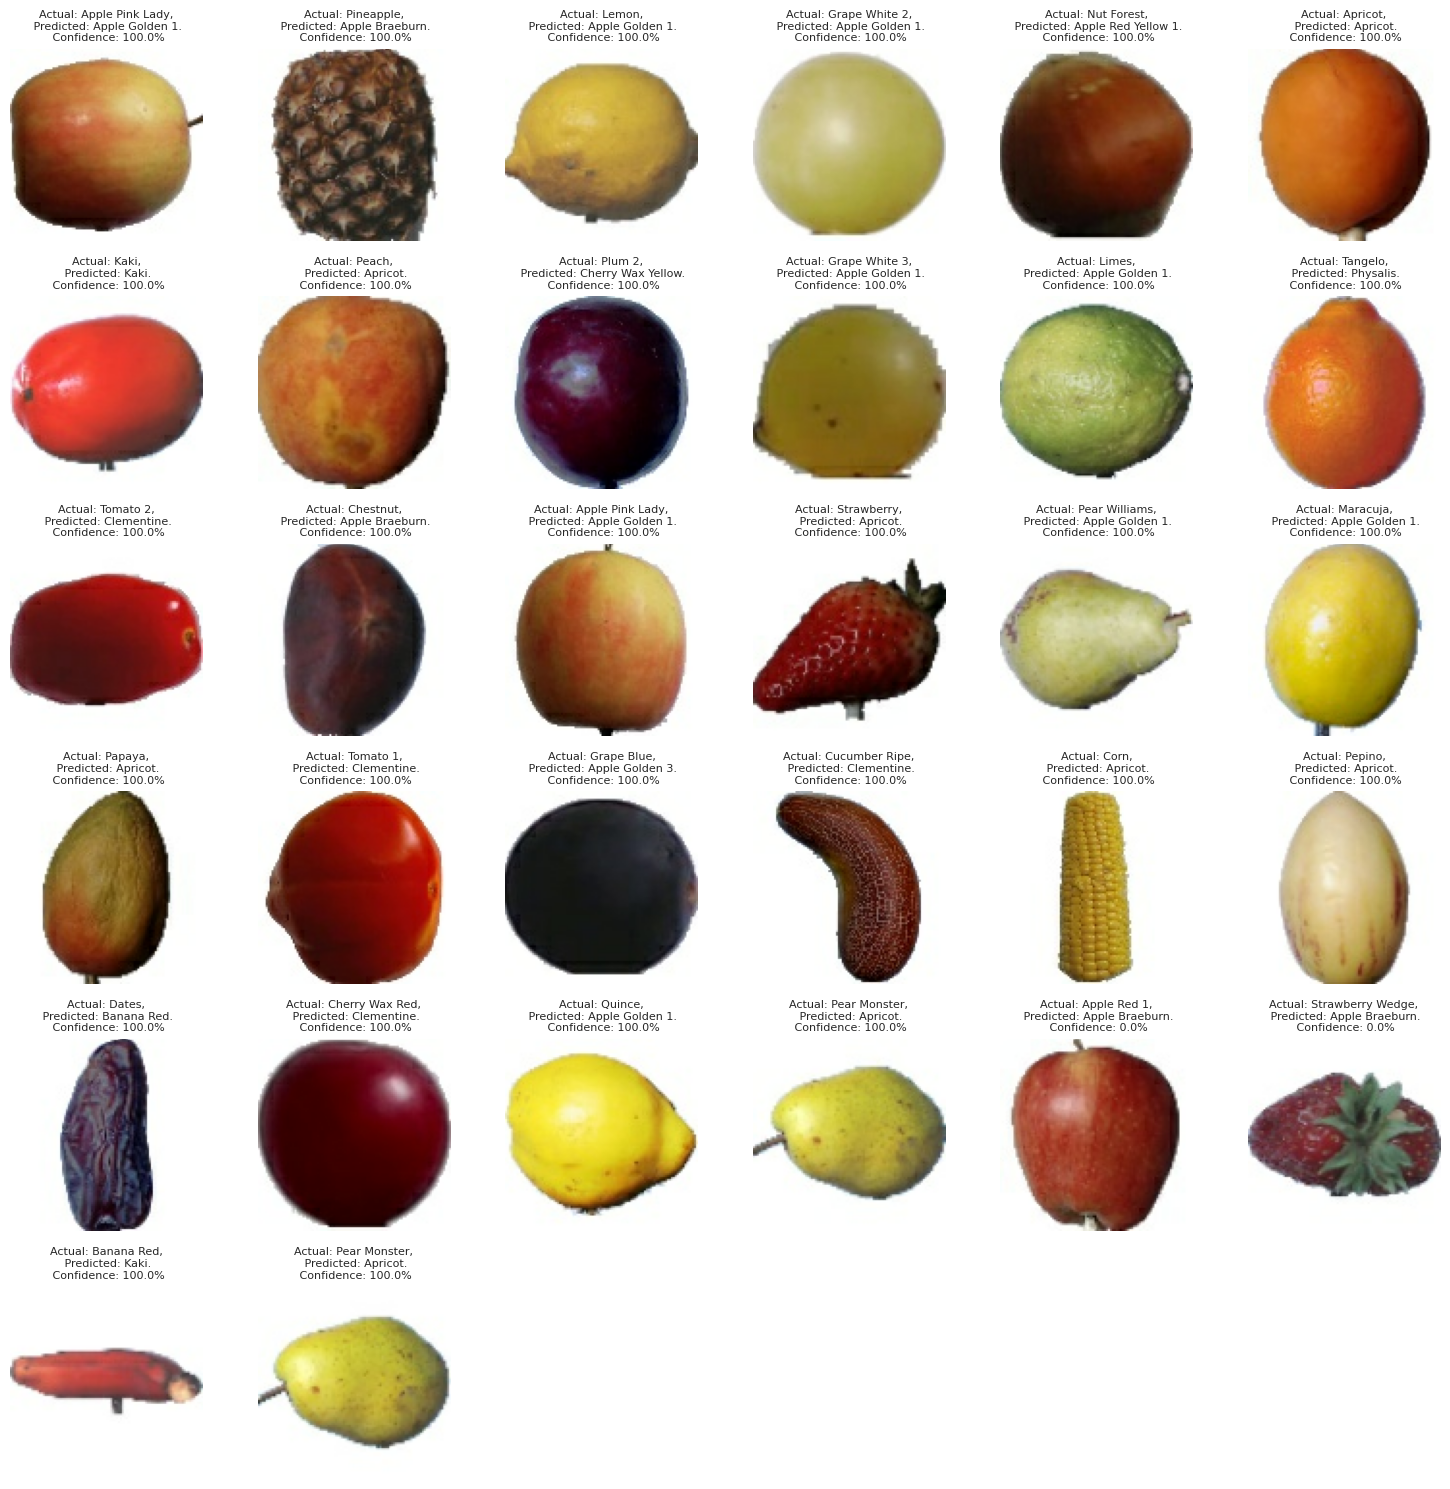

In [86]:
plt.figure(figsize=(15, 15))

# Iterate over the batches and then the images to display their predictions
batch_size = 32
for images, labels in test_dataset.take(32):
    for i in range(batch_size):
        if i >= len(images):
            break

        ax = plt.subplot(6, 6, i + 1)
        image = tf.image.resize(images[i], (100, 100))
        plt.imshow(image.numpy().astype("uint8"))
        predicted_class, confidence = predict(cnn, images[i].numpy())
        actual_class = ts_class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%", fontsize=8)
        plt.axis("off")

    # If there are more than batch size images, break out of the loop
    if i >= batch_size - 1:
        break

# Hide any empty subplots
for i in range(i + 1, batch_size):
    plt.subplot(6,6, i + 1)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [87]:
cnn.save('cnnFriut.h5')
print('Model Saved!')

Model Saved!
